In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [7]:
train_datagen=ImageDataGenerator(
    rescale=1./255,#similar to normalization(feature scaling)
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
#Image augmentation
training_set = train_datagen.flow_from_directory(
        'OneDrive/Documents/archive/train',
        target_size=(48, 48),
        batch_size=64,
        class_mode='categorical',
        color_mode="grayscale"
)




Found 21591 images belonging to 5 classes.


In [8]:
test_datagen=ImageDataGenerator(
    rescale=1./255,
)
test_set = test_datagen.flow_from_directory(
        'OneDrive/Documents/archive/test',
        target_size=(48, 48),
        batch_size=64,
        class_mode='categorical',
        color_mode="grayscale"
)



Found 5639 images belonging to 5 classes.


In [9]:
cnn=tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=(48,48,1)))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='same'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='same'))
cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=1024,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.5))

cnn.add(tf.keras.layers.Dense(5,activation='softmax'))

cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])



In [12]:
history=cnn.fit(x=training_set,validation_data=test_set,epochs=5)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 338 steps, validate for 89 steps
Epoch 1/5
338/338 [==============================] - 151s 446ms/step - loss: 0.7513 - accuracy: 0.7111 - val_loss: 0.7494 - val_accuracy: 0.7124
Epoch 2/5
338/338 [==============================] - 156s 460ms/step - loss: 0.7421 - accuracy: 0.7135 - val_loss: 0.7305 - val_accuracy: 0.7184
Epoch 3/5
338/338 [==============================] - 158s 468ms/step - loss: 0.7294 - accuracy: 0.7209 - val_loss: 0.7360 - val_accuracy: 0.7184
Epoch 4/5
338/338 [==============================] - 158s 468ms/step - loss: 0.7294 - accuracy: 0.7208 - val_loss: 0.7322 - val_accuracy: 0.7187
Epoch 5/5
338/338 [==============================] - 158s 467ms/step - loss: 0.7139 - accuracy: 0.7258 - val_loss: 0.7294 - val_accuracy: 0.7253


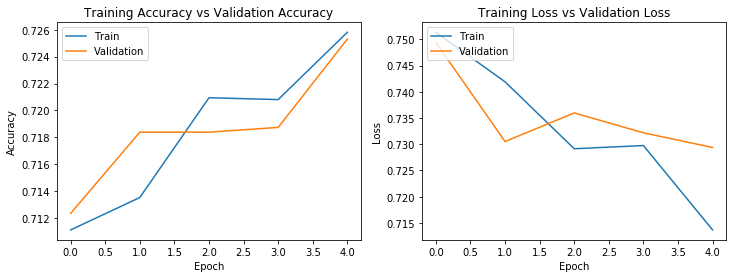

In [13]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()



In [22]:
cnn.save('save_my_model/my_model')

INFO:tensorflow:Assets written to: save_my_model/my_model\assets
